<a href="https://colab.research.google.com/github/MosesIbe23/CSE450_Machine_Learning/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv', encoding='ISO-8859-1')
#df.info()
#df.head()
#housing.head()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.5 MB/s eta 0:00:00


In [3]:

#Rename Columns for easier wrangling

df.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?': 'Seen_any_movies?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fan_of_the_film?',
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1',
    'Unnamed: 10': 'rank_2',
    'Unnamed: 11': 'rank_3',
    'Unnamed: 12': 'rank_4',
    'Unnamed: 13': 'rank_5',
    'Unnamed: 14': 'rank_6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'fav_char_1',
    'Unnamed: 16': 'fav_char_2',
    'Unnamed: 17': 'fav_char_3',
    'Unnamed: 18': 'fav_char_4',
    'Unnamed: 19': 'fav_char_5',
    'Unnamed: 20': 'fav_char_6',
    'Unnamed: 21': 'fav_char_7',
    'Unnamed: 22': 'fav_char_8',
    'Unnamed: 23': 'fav_char_9',
    'Unnamed: 24': 'fav_char_10',
    'Unnamed: 25': 'fav_char_11',
    'Unnamed: 26': 'fav_char_12',
    'Unnamed: 27': 'fav_char_13',
    'Unnamed: 28': 'fav_char_14',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.1': 'fav_char_15',
    'Unnamed: 30': 'fav_char_16',
    'Unnamed: 31': 'fav_char_17',
    'Unnamed: 32': 'fav_char_18',
    'Unnamed: 33': 'fav_char_19',
    'Unnamed: 34': 'fav_char_20',
    'Unnamed: 35': 'fav_char_21',
    'Unnamed: 36': 'fav_char_22',
    'Unnamed: 37': 'fav_char_23',
    'Unnamed: 38': 'fav_char_24',
    'Unnamed: 39': 'fav_char_25',
    'Unnamed: 40': 'fav_char_26',
    'Unnamed: 41': 'fav_char_27',
    'Unnamed: 42': 'fav_char_28',
    'Which character shot first?': 'Character_shot_first?',
    'Are you familiar with the Expanded Universe?': 'Familiar_expanded_universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 'Expanded_universe_fan?',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'Startrek_fan?',
    'Gender': 'Gender',
    'Age': 'Age',
    'Household Income': 'H_Income',
    'Education': 'Education',
    'Location (Census Region)': 'Location'
}, inplace=True)

df.head()


,RespondentID,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,fav_char_14,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,Age,H_Income,Education,Location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [ ]:
# print(df['Gender'].unique())
# print(df['Age'].unique())
# print(df['H_Income'].unique())
# print(df['Education'].unique())
# print(df['Location'].unique())


In [4]:
#Drop RespondentID column

df.drop('RespondentID', axis=1, inplace=True)
#df

# Filter respondents who have seen at least one film
df = df[df['Seen_any_movies?'] == 'Yes']

# Remove all leading, trailing, and extra spaces within the strings
columns_to_strip = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
df[columns_to_strip] = df[columns_to_strip].apply(lambda col: col.str.strip().str.replace(r'\s+', ' ', regex=True))

# Modify 'seen_1' - 'seen_6' to return 1 if the value is the specific movie, otherwise 0
df['seen_1'] = df['seen_1'].apply(lambda x: 1 if x == "Star Wars: Episode I The Phantom Menace" else 0)
df['seen_2'] = df['seen_2'].apply(lambda x: 1 if x == "Star Wars: Episode II Attack of the Clones" else 0)
df['seen_3'] = df['seen_3'].apply(lambda x: 1 if x == "Star Wars: Episode III Revenge of the Sith" else 0)
df['seen_4'] = df['seen_4'].apply(lambda x: 1 if x == "Star Wars: Episode IV A New Hope" else 0)
df['seen_5'] = df['seen_5'].apply(lambda x: 1 if x == "Star Wars: Episode V The Empire Strikes Back" else 0)
df['seen_6'] = df['seen_6'].apply(lambda x: 1 if x == "Star Wars: Episode VI Return of the Jedi" else 0)

# Create a new column for age
age_mapping = {
    '18-29': 1,
    '30-44': 2,
    '45-60': 3,
    '> 60': 4
}
df['age_numeric'] = df['Age'].map(age_mapping)
df.drop('Age', axis=1, inplace=True)

# Create a new column for education
education_mapping = {
    'Less than high school degree' : 1,
    'High school degree': 2,
    'Some college or Associate degree': 3,
    'Bachelor degree': 4,
    'Graduate degree': 5
}
df['education_numeric'] = df['Education'].map(education_mapping)
df.drop('Education', axis=1, inplace=True)

# Create a new column for income
income_mapping = {
    '$0 - $24,999': 1,
    '$25,000 - $49,999': 2,
    '$50,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000+': 5
}
df['income_numeric'] = df['H_Income'].map(income_mapping)
df.drop('H_Income', axis=1, inplace=True)

# Map categorical values to numerical values
gender_mapping = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(gender_mapping)

# Define weights for each location
location_weights = {
    'South Atlantic': 1.2,
    'West South Central': 1.1,
    'West North Central': 1.0,
    'Middle Atlantic': 1.3,
    'East North Central': 1.1,
    'Pacific': 1.4,
    'Mountain': 1.2,
    'New England': 1.5,
    'East South Central': 1.0
}

# Map weights to the Location column
df['Location_Weight'] = df['Location'].map(location_weights)

# Handle missing values by assigning a default weight
df['Location_Weight'] = df['Location_Weight'].fillna(1.0)
df.drop('Location', axis=1, inplace=True)

df
#df.head()
#df.info()


<ipython-input-4-ca8d14f2bcf7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_strip] = df[columns_to_strip].apply(lambda col: col.str.strip().str.replace(r'\s+', ' ', regex=True))
<ipython-input-4-ca8d14f2bcf7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seen_1'] = df['seen_1'].apply(lambda x: 1 if x == "Star Wars: Episode I The Phantom Menace" else 0)
<ipython-input-4-ca8d14f2bcf7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,fav_char_14,Character_shot_first?,Familiar_expanded_universe?,Expanded_universe_fan?,Startrek_fan?,Gender,age_numeric,education_numeric,income_numeric,Location_Weight
1,Yes,Yes,1,1,1,1,1,1,3,2,...,Very favorably,I don't understand this question,Yes,No,No,0.0,1.0,2.0,NaN,1.2
3,Yes,No,1,1,1,0,0,0,1,2,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,0.0,1.0,2.0,1.0,1.0
4,Yes,Yes,1,1,1,1,1,1,5,6,...,Very favorably,I don't understand this question,No,NaN,Yes,0.0,1.0,3.0,4.0,1.0
5,Yes,Yes,1,1,1,1,1,1,5,4,...,Somewhat favorably,Greedo,Yes,No,No,0.0,1.0,3.0,4.0,1.0
6,Yes,Yes,1,1,1,1,1,1,1,4,...,Very favorably,Han,Yes,No,Yes,0.0,1.0,4.0,2.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,Yes,Yes,1,1,1,1,1,1,3,4,...,Very favorably,Han,No,NaN,No,1.0,3.0,3.0,1.0,1.4
1182,Yes,Yes,1,1,1,1,1,1,5,4,...,Very favorably,Han,No,NaN,Yes,1.0,1.0,3.0,1.0,1.1
1183,Yes,Yes,1,1,1,1,1,1,4,5,...,Very favorably,I don't understand this question,No,NaN,Yes,1.0,2.0,4.0,3.0,1.2
1185,Yes,Yes,1,1,1,1,1,1,4,3,...,Very favorably,Han,No,NaN,Yes,1.0,3.0,3.0,4.0,1.1


In [5]:
# Derived Columns for age, gender, income and education
df['age_income_interaction'] = df['age_numeric'] * df['income_numeric']
df['age_education_interaction'] = df['age_numeric'] * df['education_numeric']
df['income_education_interaction'] = df['income_numeric'] * df['education_numeric']
df['gender_income_interaction'] = df['Gender'] * df['income_numeric']
df['gender_education_interaction'] = df['Gender'] * df['education_numeric']
df['Location_income_interaction'] = df['Location_Weight'] * df['income_numeric']

# Drop the original 'Location' column
df.drop('Location_Weight', axis=1, inplace=True)

# Create target column
df['target'] = ((df['income_numeric'] < 4)).astype(int)

df.drop(['income_numeric'], axis=1, inplace=True)
print(df.columns)


Index(['Seen_any_movies?', 'Fan_of_the_film?', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'rank_1', 'rank_2', 'rank_3', 'rank_4',
       'rank_5', 'rank_6', 'fav_char_1', 'fav_char_2', 'fav_char_3',
       'fav_char_4', 'fav_char_5', 'fav_char_6', 'fav_char_7', 'fav_char_8',
       'fav_char_9', 'fav_char_10', 'fav_char_11', 'fav_char_12',
       'fav_char_13', 'fav_char_14', 'Character_shot_first?',
       'Familiar_expanded_universe?', 'Expanded_universe_fan?',
       'Startrek_fan?', 'Gender', 'age_numeric', 'education_numeric',
       'age_income_interaction', 'age_education_interaction',
       'income_education_interaction', 'gender_income_interaction',
       'gender_education_interaction', 'Location_income_interaction',
       'target'],
      dtype='object')


In [6]:
#print(df.isnull().sum())

# Replace blank values with NaN, and drop any remaining rows with missing values
df.replace("", np.nan, inplace=True)

# Combine numerical and categorical column logic
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        if 'N/A' in df[col].unique():  # Check if 'N/A' is in the column
            df[col].replace('N/A', None, inplace=True)  # Replace 'N/A' with NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure column is numeric
        df[col].fillna(df[col].mean(), inplace=True)  # Fill NaN with mean
    else:  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode

# Verify that there are no more missing values
print(df.isnull().sum())

df.head()


Seen_any_movies?                0
Fan_of_the_film?                0
seen_1                          0
seen_2                          0
seen_3                          0
seen_4                          0
seen_5                          0
seen_6                          0
rank_1                          0
rank_2                          0
rank_3                          0
rank_4                          0
rank_5                          0
rank_6                          0
fav_char_1                      0
fav_char_2                      0
fav_char_3                      0
fav_char_4                      0
fav_char_5                      0
fav_char_6                      0
fav_char_7                      0
fav_char_8                      0
fav_char_9                      0
fav_char_10                     0
fav_char_11                     0
fav_char_12                     0
fav_char_13                     0
fav_char_14                     0
Character_shot_first?           0
Familiar_expan

<ipython-input-6-bd1a8d2b0224>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Fill NaN with mode
<ipython-input-6-bd1a8d2b0224>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,Seen_any_movies?,Fan_of_the_film?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,...,Gender,age_numeric,education_numeric,age_income_interaction,age_education_interaction,income_education_interaction,gender_income_interaction,gender_education_interaction,Location_income_interaction,target
1,Yes,Yes,1,1,1,1,1,1,3,2,...,0.0,1.0,2.0,7.496296,2.0,11.252226,1.337778,0.0,3.506074,0
3,Yes,No,1,1,1,0,0,0,1,2,...,0.0,1.0,2.0,1.000000,2.0,2.000000,0.000000,0.0,1.000000,1
4,Yes,Yes,1,1,1,1,1,1,5,6,...,0.0,1.0,3.0,4.000000,3.0,12.000000,0.000000,0.0,4.000000,0
5,Yes,Yes,1,1,1,1,1,1,5,4,...,0.0,1.0,3.0,4.000000,3.0,12.000000,0.000000,0.0,4.000000,0
6,Yes,Yes,1,1,1,1,1,1,1,4,...,0.0,1.0,4.0,2.000000,4.0,8.000000,0.000000,0.0,2.600000,1


In [8]:
# Define features and target
traindf = pd.get_dummies(df, drop_first= True)
traindf = traindf.reindex(columns=traindf.columns, fill_value=0)
traindf

X = traindf.drop(['target'], axis=1)
y = traindf['target']  # Target variable indicating if income is more than $50k

X.head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Gender,age_numeric,education_numeric,age_income_interaction,...,fav_char_14_Somewhat favorably,fav_char_14_Somewhat unfavorably,fav_char_14_Unfamiliar (N/A),fav_char_14_Very favorably,fav_char_14_Very unfavorably,Character_shot_first?_Han,Character_shot_first?_I don't understand this question,Familiar_expanded_universe?_Yes,Expanded_universe_fan?_Yes,Startrek_fan?_Yes
1,1,1,1,1,1,1,0.0,1.0,2.0,7.496296,...,False,False,False,True,False,False,True,True,False,False
3,1,1,1,0,0,0,0.0,1.0,2.0,1.000000,...,False,False,True,False,False,False,True,False,False,False
4,1,1,1,1,1,1,0.0,1.0,3.0,4.000000,...,False,False,False,True,False,False,True,False,False,True
5,1,1,1,1,1,1,0.0,1.0,3.0,4.000000,...,True,False,False,False,False,False,False,True,False,False
6,1,1,1,1,1,1,0.0,1.0,4.0,2.000000,...,False,False,False,True,False,True,False,True,False,True


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       136
           1       0.81      0.83      0.82       145

    accuracy                           0.81       281
   macro avg       0.81      0.81      0.81       281
weighted avg       0.81      0.81      0.81       281


Accuracy Score: 0.81


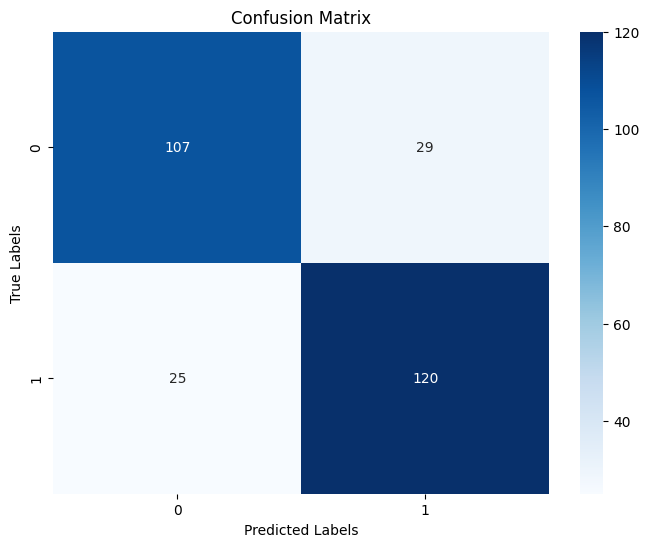

In [9]:
from sklearn.model_selection import GridSearchCV

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()  # Or MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train the model (Logistic Regression example)
model = LogisticRegression(max_iter=10000, class_weight='balanced', solver='liblinear')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 (Lasso) or L2 (Ridge) regularization
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Classification Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits = 2))
print("\nAccuracy Score:", round(accuracy_score(y_test, y_pred), 2))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


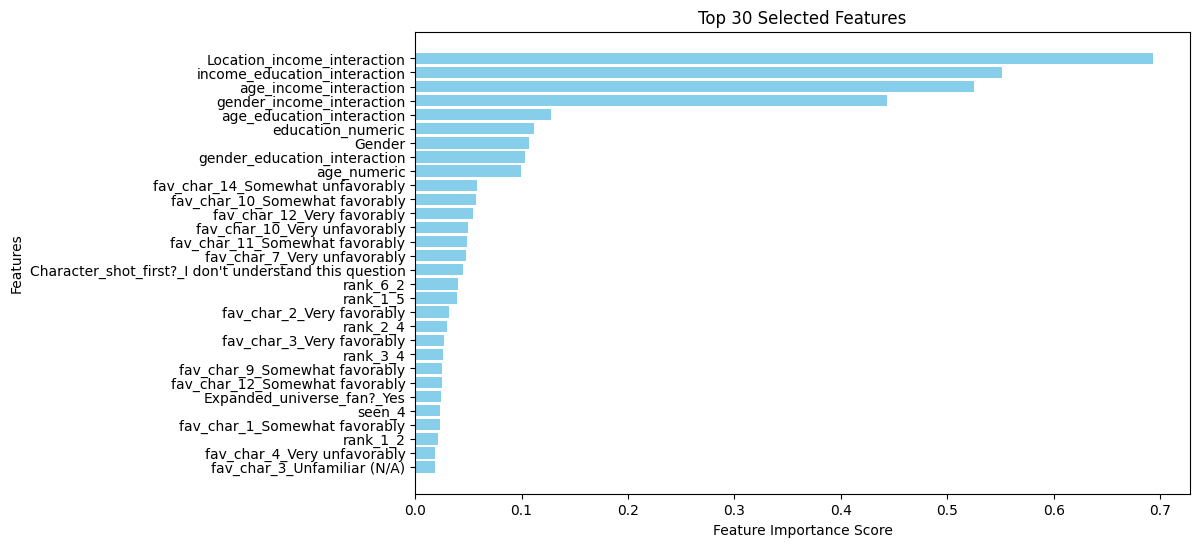

In [10]:
# Visualize the top 30 features with their scores
def plot_top_features(X_train, feature_names, selector, num_features=30):
    # Get the scores of all features
    feature_scores = selector.scores_

    # Sort the scores in descending order and get the top `num_features`
    top_indices = np.argsort(feature_scores)[-num_features:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_scores = feature_scores[top_indices]

    # Plot the top features
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_scores, color='skyblue')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top 30 Selected Features")
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.show()

# Call the function after fitting the selector
feature_names = X.columns  # Assuming X is a pandas DataFrame with feature names

# Define the selector here (or move its definition outside of any function)
from sklearn.feature_selection import SelectKBest, mutual_info_classif # Make sure these are imported
selector = SelectKBest(score_func=mutual_info_classif, k=20) # Initialize SelectKBest
selector.fit(X_train, y_train) # Fit the selector to your data

plot_top_features(X_train, feature_names, selector, num_features=30)


F1-Score: 0.82
ROC-AUC: 0.9


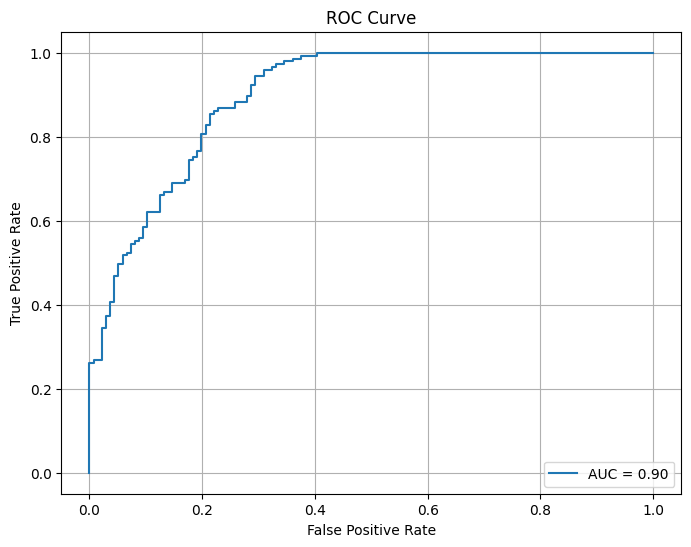

Average Precision-Recall AUC: 0.89


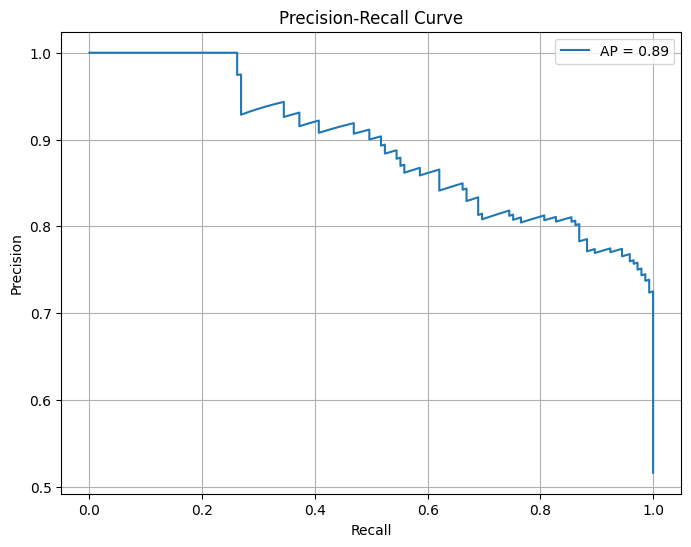

In [11]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", round(f1, 2))

# ROC-AUC
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", round(roc_auc, 2))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)
print("Average Precision-Recall AUC:", round(average_precision, 2))

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {average_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid()
plt.show()
